Feature selection is all about picking the right features for your model, just like a chef picks the
best ingredients for their dish.

The goal is to improve model performance and reduce complexity.

• Filter Methods (like correlation matrix): Identify which features are strongly correlated
with the target variable.

• Wrapper Methods (like RFE): Use a model to help select the most important features.

• Embedded Methods (like Lasso): Perform feature selection as part of the model training
process.

"C:\Users\devid\Desktop\datasets\Automobile_data.csv"

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
#path = "C:\\Users\\devid\\Desktop\\datasets\\Automobile_data.csv"
#path = "Automobile_data.csv"
#df = pd.read_csv(path)
# C:\Users\devid\Desktop\datasets\Automobile_data.csv" ^
# SyntaxError: (unicode error) 'unicodeescape' codec can't decode
#df = pd.read_csv("./Automobile_data.csv")
df = pd.read_csv("Automobile_data.csv")
#df = pd.read_csv(Automobile_data.csv) #Error:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [21]:
# Check the data type of the 'wheel-base' column
print(df['wheel-base'].dtype)

# Data Exploration
# df.describe()
df.info()





float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size       

In [13]:
#df.isnull()
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [23]:
print(df.duplicated().sum()) # Print duplicate rows

0


In [25]:
# Check if there is any special character present as value in the dataset
# Handling missing values (replace '?' with NaN and drop missing values)
df.replace("?", np.nan, inplace=True) # replaces all occurrences of "?" in the df with NaN
df.dropna(inplace=True) # removes any rows in the DataFrame that contain NaN values
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [27]:
# Converting necessary columns to numeric
for col in [ "body-style", "horsepower", "highway-mpg", "price"]:
 df[col] = pd.to_numeric(df[col]) # Figure out what pd.to_numeric() is doing?
df.head()

ValueError: Unable to parse string "sedan" at position 0

In [31]:
df['wheel-base'].dtype
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [33]:
# Encoding categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
 le = LabelEncoder()
 df[column] = le.fit_transform(df[column])
 label_encoders[column] = le
df.head()
# Print labels for all the coloumns

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,27,0,1,0,0,3,1,0,99.8,...,109,4,12,20,10.0,2,15,24,30,22
4,2,27,0,1,0,0,3,0,0,99.4,...,136,4,12,20,8.0,8,15,18,22,38
6,1,25,0,1,0,0,3,1,0,105.8,...,136,4,12,20,8.5,4,15,19,25,40
8,1,25,0,1,1,0,3,1,0,105.8,...,131,4,9,20,8.3,14,15,17,20,56
10,2,31,1,1,0,1,3,2,0,101.2,...,108,4,22,4,8.8,1,17,23,29,30


In [35]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,27,0,1,0,0,3,1,0,99.8,...,109,4,12,20,10.0,2,15,24,30,22
4,2,27,0,1,0,0,3,0,0,99.4,...,136,4,12,20,8.0,8,15,18,22,38
6,1,25,0,1,0,0,3,1,0,105.8,...,136,4,12,20,8.5,4,15,19,25,40
8,1,25,0,1,1,0,3,1,0,105.8,...,131,4,9,20,8.3,14,15,17,20,56
10,2,31,1,1,0,1,3,2,0,101.2,...,108,4,22,4,8.8,1,17,23,29,30


### Step 1: Correlation Matrix (Filter Method)

We can start by looking at the correlation between each feature and the target variable (Price).
This will help us understand which features have a strong relationship with the target.


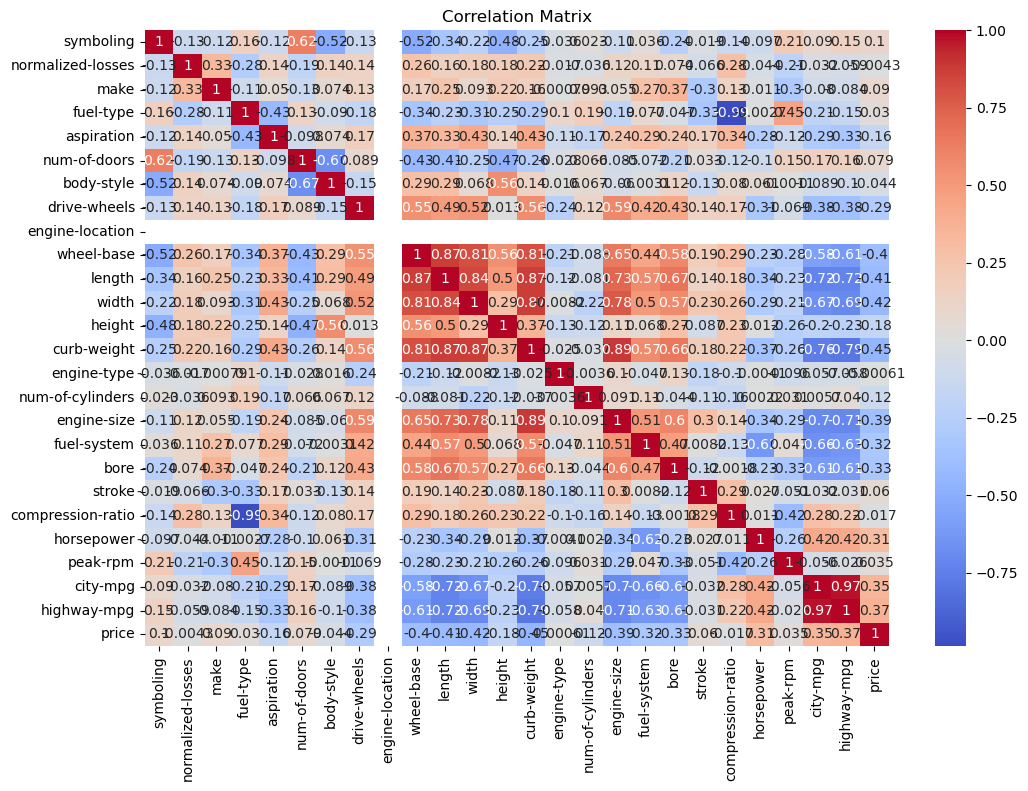

In [40]:
# Correlation matrix for numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Using Chi-Square Test with SelectKBest (Filter Method)

In [43]:
# Separate features and target
X = df.drop("price", axis=1) # Features
y = df["price"] # Target variable
y

3      22
4      38
6      40
8      56
10     30
       ..
200    34
201    48
202    52
203    54
204    55
Name: price, Length: 159, dtype: int32

In [47]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Step 1: Scale features to be in the range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply SelectKBest with chi2
select_k_best = SelectKBest(chi2, k=6)
X_new = select_k_best.fit_transform(X_scaled, y)

# Step 3: Get selected feature names (optional but helpful)
selected_mask = select_k_best.get_support()
selected_features = X.columns[selected_mask]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['normalized-losses', 'aspiration', 'num-of-doors', 'fuel-system',
       'bore', 'compression-ratio'],
      dtype='object')


In [61]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Step 1: Scale the data for chi2
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit SelectKBest
select_k_best = SelectKBest(chi2, k=6)
X_new = select_k_best.fit_transform(X_scaled, y)

# Step 3: Get the selected feature names from the original X (which has column names)
selected_mask = select_k_best.get_support()
selected_features = X.columns[selected_mask]

print("Selected Features using Chi-Square Test:", selected_features.tolist())


Selected Features using Chi-Square Test: ['normalized-losses', 'aspiration', 'num-of-doors', 'fuel-system', 'bore', 'compression-ratio']


### Step 2: Recursive Feature Elimination (RFE) (Wrapper Method)

We can now use RFE to select the most important features for a classifier. We will use logistic
regression for this simple example.

Recursive Feature Elimination (RFE) is a method to iteratively remove less significant features,
focusing on those that enhance predictive accuracy.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import numpy as np

# Example data: 5 samples with 4 features
X = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16],
              [17, 18, 19, 20]])

# Example target: 5 target labels for the samples
y = np.array([0, 1, 0, 1, 0])

# Initialize a random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define RFE (using the model to select 2 features)
rfe = RFE(model, n_features_to_select=2)

# Fit RFE
rfe.fit(X, y)

# Get selected feature indices
selected_features = rfe.support_

# Print the selected features (True means the feature is selected)
print("Selected Features:", selected_features)



Selected Features: [ True  True False False]


### Step 3: Lasso (Embedded Method)

Lastly, we can use Lasso (L1 regularization) to perform feature selection while training a model.

In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming X is a numpy array, you can convert it to a DataFrame
# Example: X = np.array([...]) -> convert it to pandas DataFrame with feature names
X = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])  # Replace with actual feature names
y = np.array([0, 1, 0, 1, 0])  # Example target values

# Initialize a random forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to get feature importances
model_rf.fit(X, y)
feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns)

# Get top 5 features
top_features_embedded = feature_importances.nlargest(5).index
print("Selected Features using Embedded Method (Random Forest):", top_features_embedded.tolist())


Selected Features using Embedded Method (Random Forest): ['Feature2', 'Feature1', 'Feature3', 'Feature4']


#### One-Hot Encoding in Python


In [37]:
import pandas as pd
df = pd.DataFrame({
 'color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
 'shape': ['Circle', 'Square', 'Circle', 'Square', 'Circle']
})
df

,color,shape
0,Red,Circle
1,Blue,Square
2,Green,Circle
3,Blue,Square
4,Red,Circle


Use the pd.get_dummies() function to automatically generate one-hot encoded columns.

In [39]:
df_encoded = pd.get_dummies(df, columns=['color', 'shape'])
df_encoded

,color_Blue,color_Green,color_Red,shape_Circle,shape_Square
0,False,False,True,True,False
1,True,False,False,False,True
2,False,True,False,True,False
3,True,False,False,False,True
4,False,False,True,True,False
